### Motivation
1. Taking advantage of the amount of data that is available nowadays, the authors performed statistical analysis and machine learning to extract knowledge in the current situation of financial inclusion and the factors affecting it. By applying advanced machine learning algorithms to the financial inclusion dataset to predict a person’s likelihood of having a bank account. This would enable the financial institutions to get an understanding of what features make a person capable of having a bank account. Having all that reliable information or guidance, financial institutions can take considerable measures and create a system or come up with a strategy that will help make all members of the society (regardless of class or gender) aware of financial inclusion and its benefits.



In [1]:
import warnings

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas_profiling import profile_report

warnings.filterwarnings("ignore")
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    HistGradientBoostingClassifier,
    RandomForestClassifier,
)
# import classification algorithm
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.linear_model import LogisticRegression
# evaluation matrics
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    roc_auc_score,
)
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsClassifier
# import preprocessing module
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [2]:
import numpy as np
from numpy import random

random.seed(42)
seed = np.random.seed(42)

In [3]:
%matplotlib inline

In [4]:
train = pd.read_csv("Train_v2.csv")
test = pd.read_csv("Test_v2.csv")
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [5]:
test.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,2018,uniqueid_6060,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
2,Kenya,2018,uniqueid_6065,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent
3,Kenya,2018,uniqueid_6072,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
4,Kenya,2018,uniqueid_6073,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent


# Explolatory Data Analysis
*This is the process of finding some insights from you dataset before create predictive models.*

Note: This is important steps in your Data science workflow.

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


## Let see the statistical overview of our dataset

In [7]:
# describe will show statistical info
train.describe()

,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


From the above cell we can see that most of our features are categorical because ony 3 columns are numerical that's why it shows only those 3 with the mean, count, standard deviation also the minimum value of each columns the maximum value of each columns along with the interquartile range

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


From this info method we got to know more about our data it first show us the number of non null count als the datatype of each columns along with the total number of each datatypes we have. It shows here that we have 3 features with *int* dataypte and 10 *objects* datatype also it tell us about the size of the file we have which is in our case 2.3MB

In [9]:
# to show the shape of the data
train.shape

(23524, 13)

In [10]:
train.year.value_counts()

2016    8735
2018    8169
2017    6620
Name: year, dtype: int64

### Target Distribution

<AxesSubplot:title={'center':'Unbalance classes'}, xlabel='bank_account', ylabel='count'>

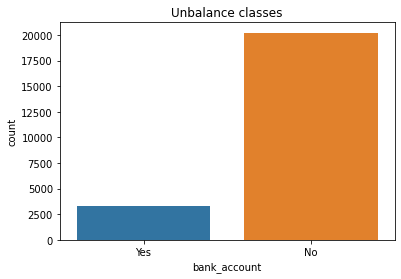

In [11]:
plt.title("Unbalance classes")
sns.countplot(train.bank_account)

Before we move futher we are going to encode the target variable **yes** to 1 and **No** to 0 accordingly.

In [12]:
train["bank_account"] = train["bank_account"].map({"Yes": 1, "No": 0})
train.bank_account

0        1
1        0
2        1
3        0
4        0
        ..
23519    0
23520    0
23521    0
23522    0
23523    0
Name: bank_account, Length: 23524, dtype: int64

From the above cell we can see that we have unbalanced data basically the number of No is much higher than the number of yes which can lead to poor model performence sometimes. In this can we've about 2500 yes and 20000 No which gives us a big difference later on we will what we can do for this .

### Let's see the percentage of missing data

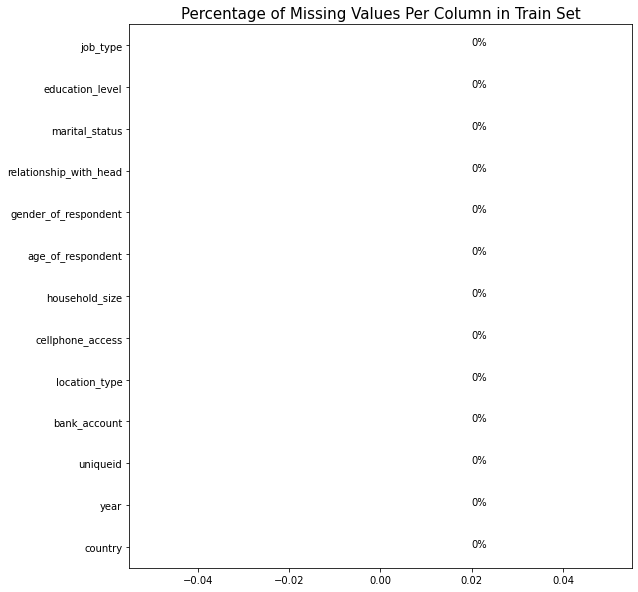

In [13]:
# Check if there any missing values in train set
ax = train.isna().sum().sort_values().plot(kind="barh", figsize=(9, 10))
plt.title("Percentage of Missing Values Per Column in Train Set", fontdict={"size": 15})
for p in ax.patches:
    percentage = "{:,.0f}%".format((p.get_width() / train.shape[0]) * 100)
    width, height = p.get_width(), p.get_height()
    x = p.get_x() + width + 0.02
    y = p.get_y() + height / 2
    ax.annotate(percentage, (x, y))

It shows that we don't have any missing values which is good

### Let's see the disctribution of the people with cellphone based on gender.

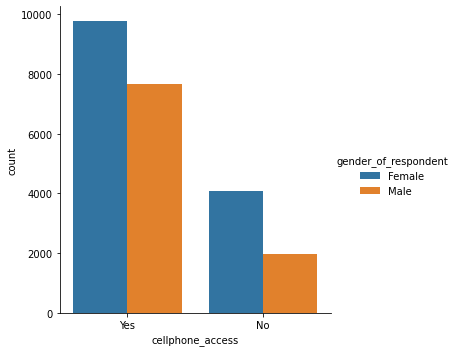

In [14]:
sns.catplot(x="cellphone_access", data=train, kind="count", hue="gender_of_respondent")
plt.show()

This shows that number of male having cellphones is higher than the numbero female in this case.

## Let's see the distribution of age

<AxesSubplot:xlabel='age_of_respondent', ylabel='Density'>

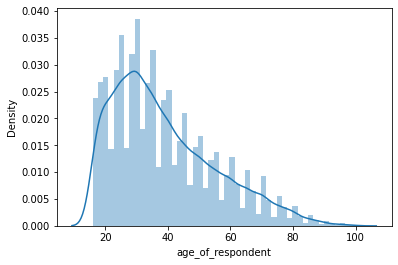

In [15]:
sns.distplot(train.age_of_respondent)

This distribution make sense because we have age range from 16 years old to 100 year

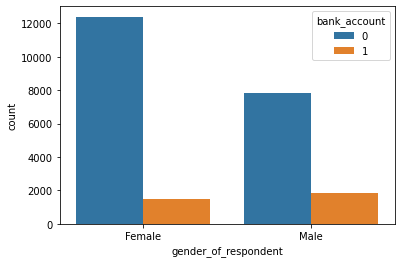

In [16]:
# Distribution of the gender
sns.countplot(train.gender_of_respondent, hue="bank_account", data=train)
plt.show()

we can see that the number of female that have bank account is higher than the number of male with a bank account. 

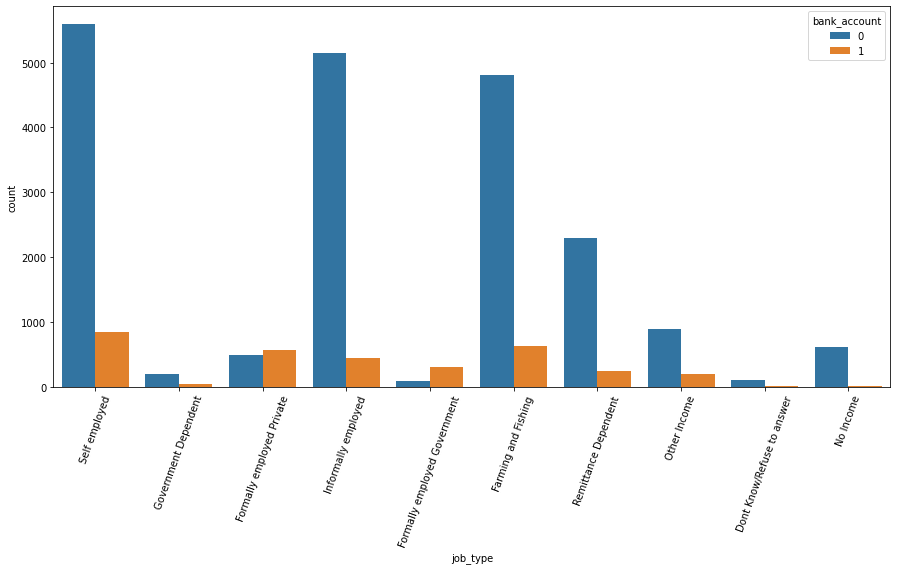

In [17]:
# distribution of job type
plt.figure(figsize=(15, 7))
sns.countplot(train.job_type, orient="h", hue="bank_account", data=train)
labels = [
    "Self employed",
    "Government Dependent",
    "Formally employed Private",
    "Informally employed",
    "Formally employed Government",
    "Farming and Fishing",
    "Remittance Dependent",
    "Other Income",
    "Dont Know/Refuse to answer",
    "No Income",
]
ax = plt.gca()
ax.set_xticklabels(labels=labels, rotation=70);

we can see from the above graph the the people who are self employed and farming and fishing are those who are more likely to have bank account as compare to the those who work for the Government or other income. 
We can notice also those who don't have no Income and does who reuse to answer don't have high chance of having bank account.

<AxesSubplot:xlabel='location_type', ylabel='count'>

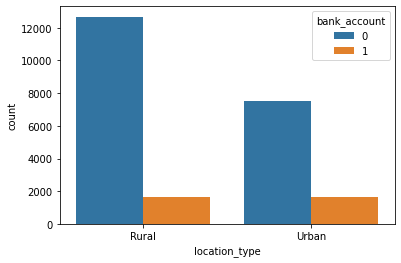

In [18]:
# Distribution of the location based on account
sns.countplot(train.location_type, hue="bank_account", data=train)

We can see that people in Urban area is have more chance to have bank_account than those who are in Rural area although we can see also the number people in Rural area is higher.

<AxesSubplot:xlabel='household_size', ylabel='count'>

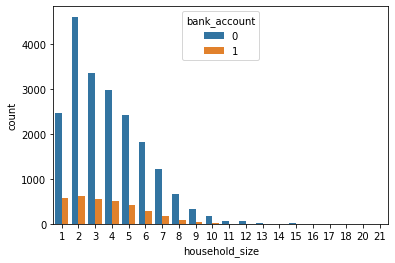

In [19]:
# Distirbution of the household_size
sns.countplot(train.household_size, hue="bank_account", data=train)

## How many people have cellphone

In [20]:
train.cellphone_access.value_counts()[0]

17454

we can see that the number of people who have cellphone access is 17454 which is more than the half which make more sense in this case

### How many types of education do the dataset has?

In [21]:
train.education_level.unique()

array(['Secondary education', 'No formal education',
       'Vocational/Specialised training', 'Primary education',
       'Tertiary education', 'Other/Dont know/RTA'], dtype=object)

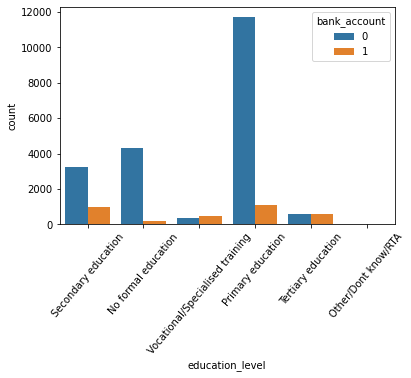

In [22]:
sns.countplot(train.education_level, hue="bank_account", data=train)
labels = [
    "Secondary education",
    "No formal education",
    "Vocational/Specialised training",
    "Primary education",
    "Tertiary education",
    "Other/Dont know/RTA",
]
ax = plt.gca()
ax.set_xticklabels(labels=labels, rotation=50);

we can see that the vocational/ specialised training is the majority in this case and we have few people with No formal education

In [23]:
train.marital_status.value_counts()

Married/Living together    10749
Single/Never Married        7983
Widowed                     2708
Divorced/Seperated          2076
Dont know                      8
Name: marital_status, dtype: int64

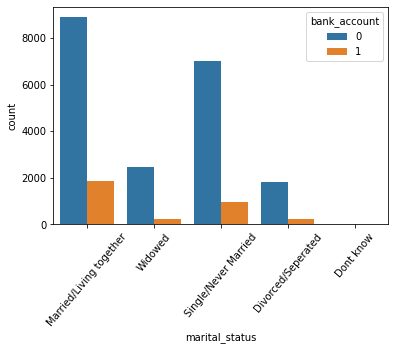

In [24]:
sns.countplot(train.marital_status, hue="bank_account", data=train)
labels = [
    "Married/Living together",
    "Widowed",
    "Single/Never Married",
    "Divorced/Seperated",
    "Dont know",
]
ax = plt.gca()
ax.set_xticklabels(labels=labels, rotation=50);

This shows that people who are married and living together are more likely to have a bank account as compare to ther slike single or divorced

In [25]:
# Separate training features from target
X_train = train.drop(["bank_account"], axis=1)
y_train = train["bank_account"]

In [26]:
# target
y_train.head()

0    1
1    0
2    1
3    0
4    0
Name: bank_account, dtype: int64

In [27]:
train["country+location"] = train["country"] + train["location_type"]
train["location+cellphone_access"] = train["location_type"] + train["cellphone_access"]
train["gender+cellphone_access"] = (
    train["gender_of_respondent"] + train["cellphone_access"]
)
train["country+cellphone_access"] = train["country"] + train["cellphone_access"]

In [28]:
test["country+location"] = test["country"] + test["location_type"]
test["location+cellphone_access"] = test["location_type"] + test["cellphone_access"]
test["gender+cellphone_access"] = (
    test["gender_of_respondent"] + test["cellphone_access"]
)
test["country+cellphone_access"] = test["country"] + test["cellphone_access"]

In [29]:
df = train.drop(["uniqueid", "year"], 1)

In [30]:
col_test = test.uniqueid
test = test.drop("uniqueid", 1)

In [31]:
test.head()

,country,year,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,country+location,location+cellphone_access,gender+cellphone_access,country+cellphone_access
0,Kenya,2018,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government,KenyaUrban,UrbanYes,MaleYes,KenyaYes
1,Kenya,2018,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private,KenyaUrban,UrbanYes,MaleYes,KenyaYes
2,Kenya,2018,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent,KenyaRural,RuralNo,FemaleNo,KenyaNo
3,Kenya,2018,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent,KenyaRural,RuralNo,FemaleNo,KenyaNo
4,Kenya,2018,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent,KenyaUrban,UrbanNo,MaleNo,KenyaNo


In [32]:
df.head()

,country,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,country+location,location+cellphone_access,gender+cellphone_access,country+cellphone_access
0,Kenya,1,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed,KenyaRural,RuralYes,FemaleYes,KenyaYes
1,Kenya,0,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent,KenyaRural,RuralNo,FemaleNo,KenyaNo
2,Kenya,1,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed,KenyaUrban,UrbanYes,MaleYes,KenyaYes
3,Kenya,0,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private,KenyaRural,RuralYes,FemaleYes,KenyaYes
4,Kenya,0,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed,KenyaUrban,UrbanNo,MaleNo,KenyaNo


In [33]:
df = pd.get_dummies(df)
df.head()

,bank_account,household_size,age_of_respondent,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,location_type_Rural,location_type_Urban,cellphone_access_No,...,gender+cellphone_access_MaleNo,gender+cellphone_access_MaleYes,country+cellphone_access_KenyaNo,country+cellphone_access_KenyaYes,country+cellphone_access_RwandaNo,country+cellphone_access_RwandaYes,country+cellphone_access_TanzaniaNo,country+cellphone_access_TanzaniaYes,country+cellphone_access_UgandaNo,country+cellphone_access_UgandaYes
0,1,3,24,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,5,70,1,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
2,1,5,26,1,0,0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0
3,0,5,34,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,8,26,1,0,0,0,0,1,1,...,1,0,1,0,0,0,0,0,0,0


In [34]:
test = pd.get_dummies(test)

In [35]:
df.shape, test.shape

((23524, 64), (10086, 64))

**Note** we can see that some features are still correlated but as we are not dealing with regression problem it doesn't matter the most. Inded we did features engineering very well.

<AxesSubplot:ylabel='Frequency'>

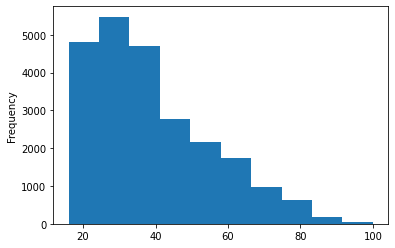

In [37]:
df.age_of_respondent.plot(kind="hist")

In [38]:
X = df.drop(["bank_account"], 1)
y = df.bank_account.values

In [39]:
from imblearn.over_sampling import SMOTE

In [40]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

<AxesSubplot:title={'center':'Balanced classes'}, ylabel='count'>

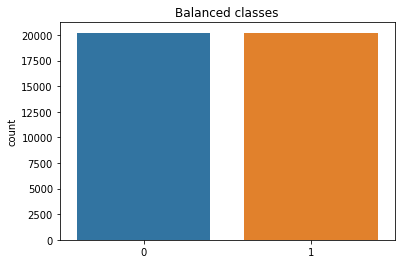

In [41]:
oversample = SMOTE()
# Oversampling the target data
X, y = oversample.fit_resample(X, y)
plt.title("Balanced classes")
sns.countplot(y)

## Trying Different Algorithms from Sklearn

In [42]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=seed, test_size=0.2
)

In [43]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [44]:
models = {
    "SVM": SVC(),
    "XGB": XGBClassifier(),
    "KNN": KNeighborsClassifier(),
    "RF": RandomForestClassifier(),
    "GB": GradientBoostingClassifier(),
    "DTC": DecisionTreeClassifier(),
    "HGB": HistGradientBoostingClassifier(),
    "ADB": AdaBoostClassifier(),
}


for model_name, model in models.items():
    print("Train {}".format(model_name))
    # cross_val_score for each classifier
    scores = cross_val_score(model, X_train, y_train, cv=10, scoring="f1")

    print("List of scores for {}: {}".format(model_name, scores))
    print("The mean score for {}: {}".format(model_name, scores.mean()))
    print("-------------The End------------------")

Train XGB
[14:42:42] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:42:59] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:43:14] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:43:27] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore 

### SVM

In [45]:
svc = SVC(gamma="auto", kernel="rbf", C=5)
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

f1_svc = f1_score(y_test, y_pred_svc)
precision_score_svc = precision_score(y_test, y_pred_svc)
recall_svc = recall_score(y_test, y_pred_svc)
accuracy_score_svc = accuracy_score(y_test, y_pred_svc)

print(f"Accuracy of svc: {accuracy_score_svc}")
print(f"precision of svc: {precision_score_svc}")
print(f"f1 of svc: {f1_svc}")
print(f"recall of svc : {recall_svc}")

Accuracy of svc: 0.8977118119975263
precision of svc: 0.9405805038335159
f1 of svc: 0.8925555411199169
recall of svc : 0.8491965389369592


### XGBoost

In [46]:
xgb = XGBClassifier(n_estimators=200, random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

f1_xgb = f1_score(y_test, y_pred_xgb)
precision_score_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
accuracy_score_xgb = accuracy_score(y_test, y_pred_xgb)

[14:53:07] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [47]:
print(f"Accuracy of xgb: {accuracy_score_xgb}")
print(f"precision of xgb: {precision_score_xgb}")
print(f"recall of xgb: {recall_xgb}")
print(f"f1 of xgb: {f1_xgb}")

Accuracy of xgb: 0.9083487940630798
precision of xgb: 0.9240246406570842
recall of xgb: 0.8899876390605687
f1 of xgb: 0.9066868152625613


### KNN

In [48]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

f1_knn = f1_score(y_test, y_pred_knn)
precision_score_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
accuracy_score_knn = accuracy_score(y_test, y_pred_knn)

In [49]:
print(f"Accuracy of knn: {accuracy_score_knn}")
print(f"precision of knn: {precision_score_knn}")
print(f"f1 of knn: {f1_knn}")
print(f"recall of knn: {recall_knn}")

Accuracy of knn: 0.894743351886209
precision of knn: 0.8916135360470819
f1 of knn: 0.8952357503385449
recall of knn: 0.8988875154511743


### Random Forest

In [50]:
rfc = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
)
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)

f1_rfc = f1_score(y_test, y_pred_rfc)
precision_score_rfc = precision_score(y_test, y_pred_rfc)
recall_rfc = recall_score(y_test, y_pred_rfc)
accuracy_score_rfc = accuracy_score(y_test, y_pred_rfc)

In [51]:
print(f"Accuracy of rfc: {accuracy_score_rfc}")
print(f"precision of rfc: {precision_score_rfc}")
print(f"f1 of rfc: {f1_rfc}")
print(f"recall of rfc: {recall_rfc}")

Accuracy of rfc: 0.9084724799010513
precision of rfc: 0.902557856272838
f1 of rfc: 0.90920245398773
recall of rfc: 0.9159456118665018


### Logistic Regression

In [52]:
lg = LogisticRegression()
lg.fit(X_train, y_train)
y_pred_lg = lg.predict(X_test)

f1_lg = f1_score(y_test, y_pred_lg)
precision_score_lg = precision_score(y_test, y_pred_lg)
recall_lg = recall_score(y_test, y_pred_lg)
accuracy_score_lg = accuracy_score(y_test, y_pred_lg)

In [53]:
print(f"Accuracy of lg: {accuracy_score_lg}")
print(f"precision of lg: {precision_score_lg}")
print(f"f1 of lg: {f1_lg}")
print(f"recall of lg: {recall_lg}")

Accuracy of lg: 0.893382807668522
precision of lg: 0.9323553382233088
f1 of lg: 0.888428682371214
recall of lg: 0.8484548825710754


In [1]:
# Gradient Boosting Classifier

In [54]:
gbc = GradientBoostingClassifier(n_estimators=200, random_state=42)
gbc.fit(X_train, y_train)
y_pred_gbc = gbc.predict(X_test)

f1_gbc = f1_score(y_test, y_pred_gbc)
precision_score_gbc = precision_score(y_test, y_pred_gbc)
recall_gbc = recall_score(y_test, y_pred_gbc)
accuracy_score_gbc = accuracy_score(y_test, y_pred_gbc)

In [55]:
print(f"Accuracy of gbc: {accuracy_score_gbc}")
print(f"precision of gbc: {precision_score_gbc}")
print(f"f1 of gbc: {f1_gbc}")
print(f"recall of gbc: {recall_gbc}")

Accuracy of gbc: 0.8848484848484849
precision of gbc: 0.903995848469123
f1 of gbc: 0.8821369793644765
recall of gbc: 0.8613102595797281


### Decision Tree

In [56]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

f1_dt = f1_score(y_test, y_pred_dt)
precision_score_dt = precision_score(y_test, y_pred_dt)
recall_df = recall_score(y_test, y_pred_dt)
accuracy_score_dt = accuracy_score(y_test, y_pred_dt)

In [57]:
print(f"Accuracy of dt: {accuracy_score_dt}")
print(f"precision of dt: {precision_score_dt}")
print(f"f1 of dt: {f1_dt}")
print(f"recall of df: {recall_df}")

Accuracy of dt: 0.8900432900432901
precision of dt: 0.881159420289855
f1 of dt: 0.8913866829566279
recall of df: 0.9018541409147095


### Histogram-based Gradient Boosting

In [58]:
hg = HistGradientBoostingClassifier()
hg.fit(X_train, y_train)
y_pred_hg = hg.predict(X_test)

f1_hg = f1_score(y_test, y_pred_hg)
precision_score_hg = precision_score(y_test, y_pred_hg)
recall_hg = recall_score(y_test, y_pred_hg)
accuracy_score_hg = accuracy_score(y_test, y_pred_hg)

In [59]:
print(f"Accuracy of hg: {accuracy_score_hg}")
print(f"precision of hg: {precision_score_hg}")
print(f"f1 of hg: {f1_hg}")
print(f"recall of hg : {recall_hg}")

Accuracy of hg: 0.901917130488559
precision of hg: 0.9221183800623053
f1 of hg: 0.899582119792326
recall of hg : 0.8781211372064277


### Adaboost

In [60]:
adb = AdaBoostClassifier()
adb.fit(X_train, y_train)
y_pred_adb = adb.predict(X_test)

f1_adb = f1_score(y_test, y_pred_adb)
precision_score_adb = precision_score(y_test, y_pred_adb)
recall_adb = recall_score(y_test, y_pred_adb)
accuracy_score_adb = accuracy_score(y_test, y_pred_adb)

print(f"Accuracy of adb: {accuracy_score_adb}")
print(f"precision of adb: {precision_score_adb}")
print(f"f1 of adb: {f1_adb}")
print(f"recall of adb : {recall_adb}")

Accuracy of adb: 0.8713667285095856
precision of adb: 0.8885440910266357
f1 of adb: 0.8685540950455005
recall of adb : 0.8494437577255871


## Table of evaluation matrics

In [61]:
scores = pd.DataFrame(
    {
        "Algoritm": [
            "SVM",
            "Logistc Regression",
            "XGB",
            "Random Forest",
            "Gradient Boosting",
            "Decision tree",
            "KNN",
            "Historgam Gradient Boosting",
            "Adaboost",
        ],
        "Accuracy": [
            accuracy_score_svc,
            accuracy_score_lg,
            accuracy_score_xgb,
            accuracy_score_rfc,
            accuracy_score_gbc,
            accuracy_score_dt,
            accuracy_score_knn,
            accuracy_score_hg,
            recall_adb,
        ],
        "F1 score": [
            f1_svc,
            f1_lg,
            f1_xgb,
            f1_rfc,
            f1_gbc,
            f1_dt,
            f1_knn,
            f1_hg,
            f1_adb,
        ],
        "Precision": [
            precision_score_svc,
            precision_score_lg,
            precision_score_xgb,
            precision_score_rfc,
            precision_score_gbc,
            precision_score_dt,
            precision_score_knn,
            precision_score_hg,
            precision_score_adb,
        ],
        "Recall": [
            recall_svc,
            recall_lg,
            recall_xgb,
            recall_rfc,
            recall_gbc,
            recall_df,
            recall_knn,
            recall_hg,
            recall_adb,
        ],
    }
)

scores

,Algoritm,Accuracy,F1 score,Precision,Recall
0,SVM,0.897712,0.892556,0.940581,0.849197
1,Logistc Regression,0.893383,0.888429,0.932355,0.848455
2,XGB,0.908349,0.906687,0.924025,0.889988
3,Random Forest,0.908472,0.909202,0.902558,0.915946
4,Gradient Boosting,0.884848,0.882137,0.903996,0.861310
5,Decision tree,0.890043,0.891387,0.881159,0.901854
6,KNN,0.894743,0.895236,0.891614,0.898888
7,Historgam Gradient Boosting,0.901917,0.899582,0.922118,0.878121
8,Adaboost,0.849444,0.868554,0.888544,0.849444
